In [56]:
from social_data_access.social_data import SocialData
from tiny_data_warehouse import DataWarehouse

import pandas as pd
tdw = DataWarehouse()


sd = SocialData()

df = sd.read('world_bank.people_living_in_slums')
df = df[df['Country Name'] == 'Brazil']
df = df.to_dict(orient='records')

data = []
for i in range(1960, 2023):
    data.append([i, df[0][str(i)]])

df = pd.DataFrame(data, columns=['year', 'percent'])
df = df[df['percent'] > 0]

    
df
    


,year,percent
40,2000,34.73978
42,2002,31.43266
44,2004,28.12555
46,2006,24.81844
48,2008,21.51132
50,2010,18.20421
52,2012,14.89710
54,2014,14.89710
56,2016,14.89710


In [17]:
for entry in df.iterrows():
    print(entry[1]['year'], entry[1]['percent'])
    tdw.write_event('social_data_access.yearly_metrics_brazil', {'metric': 'percentage_slums', 'year': entry[1]['year'], 'value': entry[1]['percent']})


2000.0 34.73978
2002.0 31.43266
2004.0 28.12555
2006.0 24.81844
2008.0 21.51132
2010.0 18.20421
2012.0 14.8971
2014.0 14.8971
2016.0 14.8971


In [71]:
df = tdw.event('social_data_access.yearly_metrics_brazil')
# convert scale down of gdp from 1ˆ12 to the trillion as a single digit
df['value'] = df['value'].apply(lambda x: x / 10**11 if x > 100 else x)

df


,metric,year,value,tdw_timestamp
0,gdp_absolute,1989.0,4.255953,2024-05-23 06:17:10.818509
0,gdp_absolute,1990.0,4.619518,2024-05-23 06:17:10.839493
0,gdp_absolute,1991.0,4.073378,2024-05-23 06:17:10.856209
0,gdp_absolute,1992.0,3.905904,2024-05-23 06:17:10.858220
0,gdp_absolute,1993.0,4.383022,2024-05-23 06:17:10.860154
0,gdp_absolute,1994.0,5.462297,2024-05-23 06:17:10.862463
0,gdp_absolute,1995.0,7.693331,2024-05-23 06:17:10.864561
0,gdp_absolute,1996.0,8.504264,2024-05-23 06:17:10.866739
0,gdp_absolute,1997.0,8.832062,2024-05-23 06:17:10.868555
0,gdp_absolute,1998.0,8.637108,2024-05-23 06:17:10.870448


<Axes: xlabel='year', ylabel='value'>

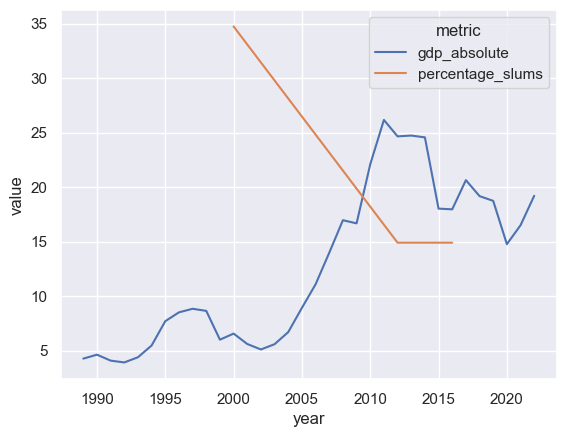

In [72]:
import seaborn as sns
sns.set_theme()
sns.lineplot(data=df, x='year', y='value', hue='metric')

In [38]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.4 MB/s eta 0:00:00a 0:00:01
